Authors: Antoine A. Ruzette, Simon F. Nørrelykke
Date: 2024-07-21

This notebook plots the correlation coefficients between cell pixel intensity and the signed distance to stroma for two partitions: inside a stromal region (distance < 0) and outside a stromal region (distance < 0) as defined by the modelled stromal border. It supports plotting results from parameter screens in QuPath. 

Contains the code to plot data from pNDRG1 images only. 

In [2]:
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pyplot import ScalarFormatter

# colorblind-friendly colors
CB_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                '#f781bf', '#a65628', '#984ea3',
                '#999999', '#e41a1c', '#dede00']

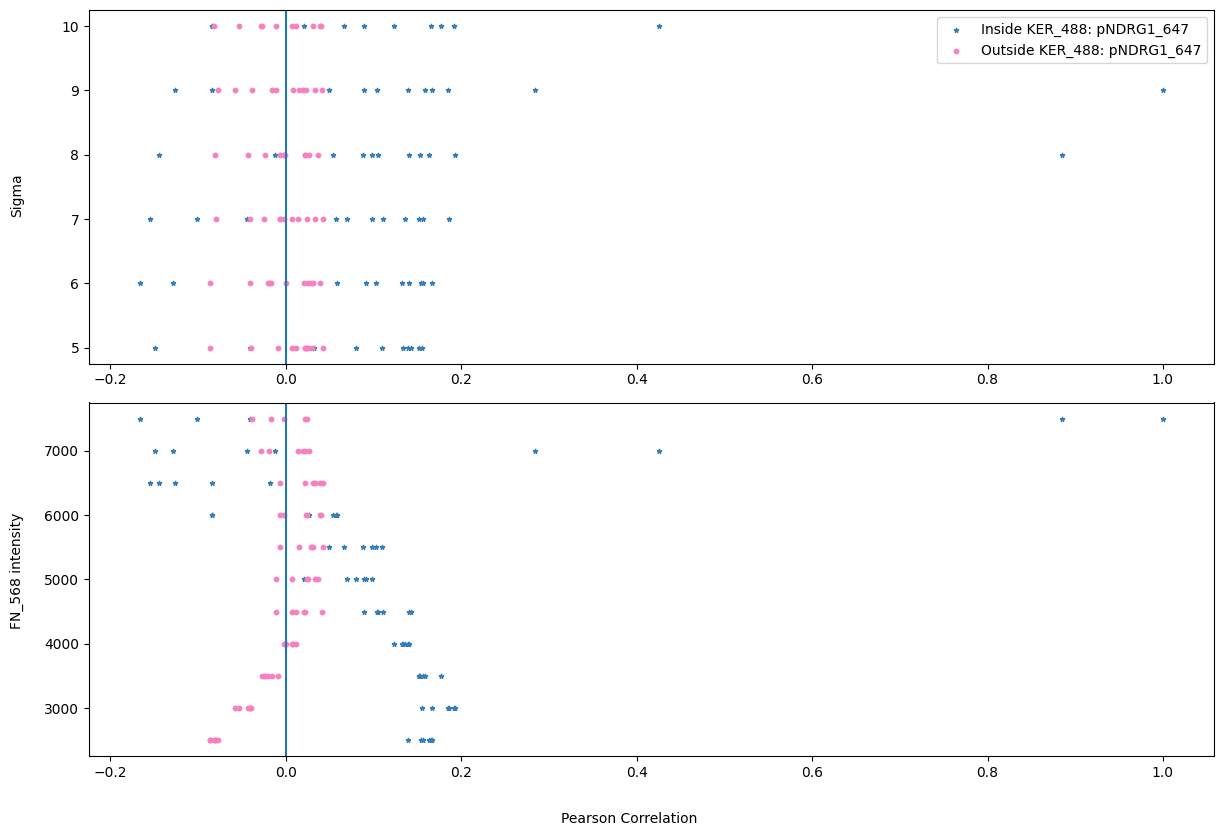

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the columns you want to load
df_stroma = pd.read_csv('/Users/antoine/Harvard/IAC/image_analysis_paper_QP_projects/AsPC_Ki67/results/sensitivity/20250311_sensitivity_s5-15_fn2000-8000/Image_AsPC LZ GEM #1 Ker488 FN568 Ki67 647 yH800.vsi - 20x_DAPI, FITC, TRITC, CY5_01.csv', encoding='latin1')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot data on each subplot
axs[0].scatter(df_stroma[" pearsonInsideStromaKerPNDRG1"], df_stroma[" sigma"], color='#377eb8', label='Inside KER_488: pNDRG1_647', s=10, marker='*')
axs[0].scatter(df_stroma[" pearsonOutsideStromaKerPNDRG1"], df_stroma[" sigma"], color='#f781bf', label='Outside KER_488: pNDRG1_647', s=10, marker='o')
axs[0].axvline(x=0)
axs[0].legend()

axs[1].scatter(df_stroma[" pearsonInsideStromaKerPNDRG1"], df_stroma["TRITC FN"], color='#377eb8', label='Inside KER_488: pNDRG1_647', s=10, marker='*')
axs[1].scatter(df_stroma[" pearsonOutsideStromaKerPNDRG1"], df_stroma["TRITC FN"], color='#f781bf', label='Outside KER_488: pNDRG1_647', s=10, marker='o')
axs[1].axvline(x=0)

# Set common labels
fig.text(0.5, -0.03, 'Pearson Correlation', ha='center', va='center')
fig.text(-0.01, 0.75, 'Sigma', ha='center', va='center', rotation='vertical')
fig.text(-0.01, 0.28, 'FN_568 intensity', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


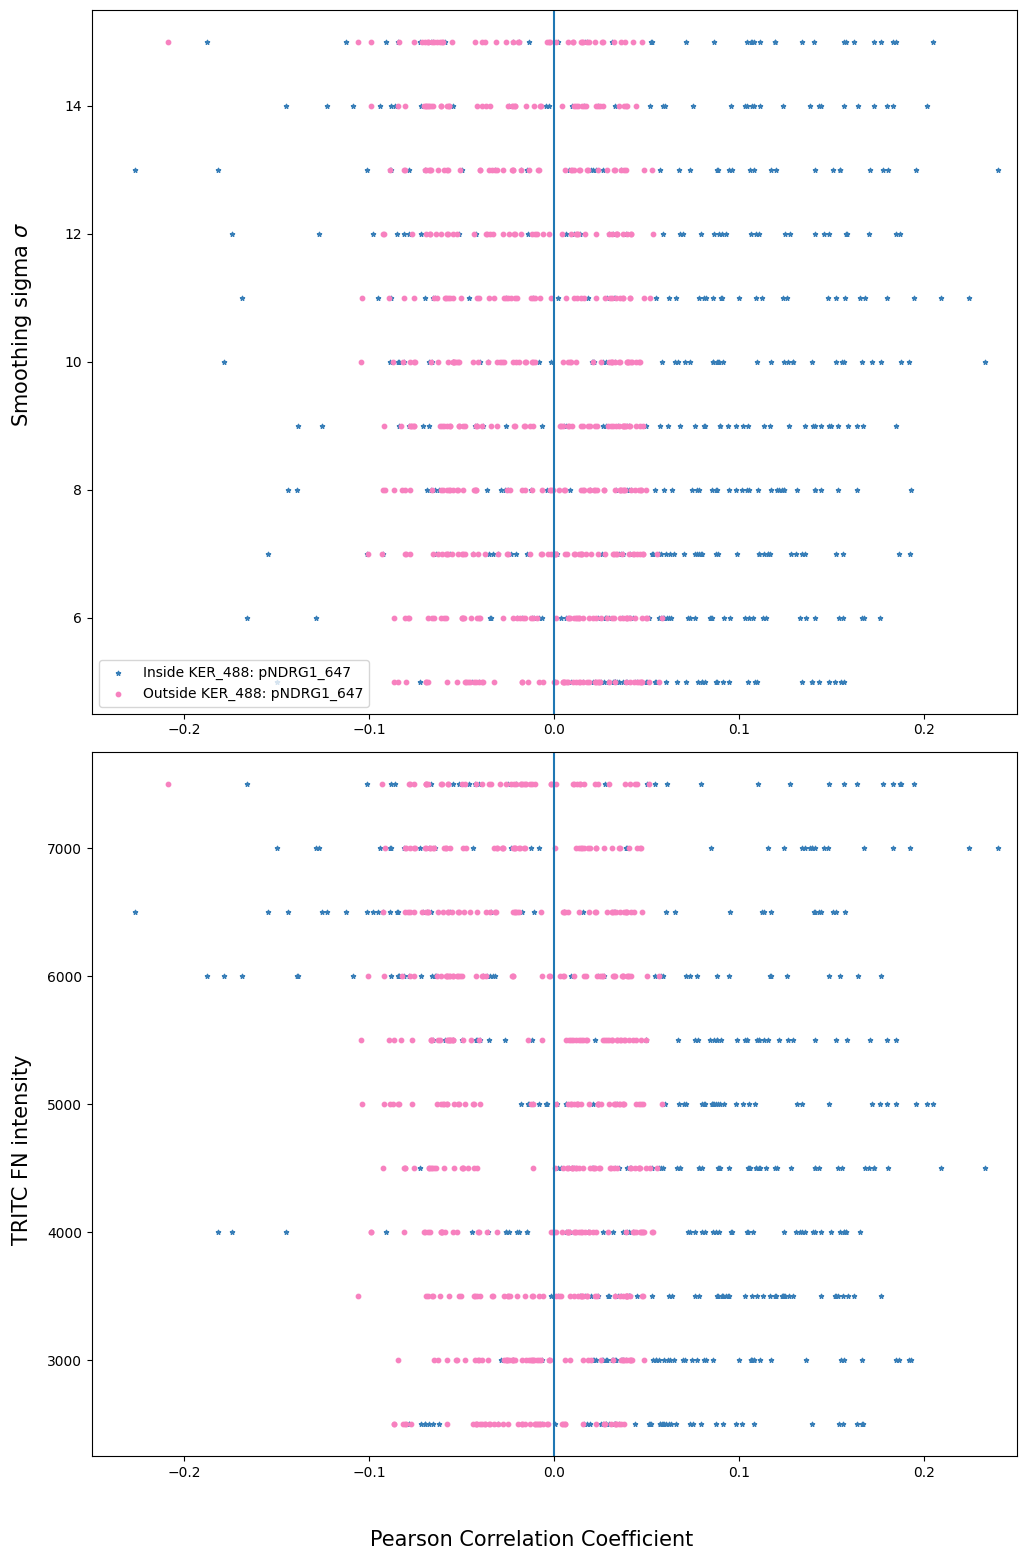

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the folder containing CSV files
folder_path = "/Users/antoine/Harvard/IAC/image_analysis_paper_QP_projects/AsPC_Ki67/results/sensitivity/20250311_sensitivity_s5-15_fn2000-8000"

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # Read CSV file and append to the list
        df = pd.read_csv(os.path.join(folder_path, file))
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df_stroma = pd.concat(dfs, ignore_index=True)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 15))


# Plot data on each subplot
axs[0].scatter(df_stroma[" pearsonInsideStromaKerPNDRG1"], df_stroma[" sigma"], color='#377eb8', label='Inside KER_488: pNDRG1_647', s=10, marker='*')
axs[0].scatter(df_stroma[" pearsonOutsideStromaKerPNDRG1"], df_stroma[" sigma"], color='#f781bf', label='Outside KER_488: pNDRG1_647', s=10, marker='o')
axs[0].axvline(x=0)
axs[0].legend()
axs[0].set_xlim(-0.25, 0.25)

axs[1].scatter(df_stroma[" pearsonInsideStromaKerPNDRG1"], df_stroma["TRITC FN"], color='#377eb8', label='Inside KER_488: pNDRG1_647', s=10, marker='*')
axs[1].scatter(df_stroma[" pearsonOutsideStromaKerPNDRG1"], df_stroma["TRITC FN"], color='#f781bf', label='Outside KER_488: pNDRG1_647', s=10, marker='o')
axs[1].axvline(x=0)
axs[1].set_xlim(-0.25, 0.25)

'''
# Plot data on each subplot
axs[0].scatter(df_stroma[" pearsonOutsideStromaKerPNDRG1"], df_stroma[" sigma"], color='lightblue', label='Outside KER_488: pNDRG1_647', s=20, marker='*')
axs[0].scatter(df_stroma[" pearsonInsideStromaKerPNDRG1"], df_stroma[" sigma"], color='darkblue', label='Inside KER_488: pNDRG1_647', s=20, marker='^')
# axs[0, 0].axvline(x=0, ls='--', color='black')
# axs[0, 0].legend(bbox_to_anchor=(.82, -0.1), fontsize='large')


axs[1].scatter(df_stroma[" pearsonInsideStromaKerPNDRG1"], df_stroma["FN_568"], color='darkblue', label='Inside KER_488: pNDRG1_647', s=20, marker='^')
axs[1].scatter(df_stroma[" pearsonOutsideStromaKerPNDRG1"], df_stroma["FN_568"], color='lightblue', label='Outside KER_488: pNDRG1_647', s=20, marker='*')
# axs[1, 0].axvline(x=0, ls='--', color='black')'''

# Adjust the position of subplots to add space between rows
# axs[0, 0].set_position([axs[0, 0].get_position().x0, axs[0, 0].get_position().y0 - 0.03, axs[0, 0].get_position().width, axs[0, 0].get_position().height])
# axs[0, 1].set_position([axs[0, 1].get_position().x0, axs[0, 1].get_position().y0 - 0.03, axs[0, 1].get_position().width, axs[0, 1].get_position().height])

# Set common labels
fig.text(0.5, -0.03, 'Pearson Correlation Coefficient', ha='center', va='center', fontsize=15)
fig.text(-0.01, 0.78, r'Smoothing sigma $\sigma$', ha='center', va='center', rotation='vertical', fontsize=15)
fig.text(-0.01, 0.23, 'TRITC FN intensity', ha='center', va='center', rotation='vertical', fontsize=15)

plt.tight_layout()
# plt.savefig('/Users/antoine/Harvard/IAC/NinaKozlova/20240111_AsPC_pNDRG1/Results/20240222_plots/sensitivity_stroma_annotation.png', dpi=500, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [8]:
from scipy.stats import ttest_ind

# Select the data for the two groups
inside_KER488_pNDRG1_647 = df_stroma[" pearsonInsideStromaKerPNDRG1"]
# Select the data for the two groups
outside_KER488_pNDRG1_647 = df_stroma[" pearsonOutsideStromaKerPNDRG1"]

# Perform the t-test
t_statistic, p_value = ttest_ind(outside_KER488_pNDRG1_647, inside_KER488_pNDRG1_647)

# Print the p-value
print("P-value for the difference in correlation coefficients between Inside KER_488: pNDRG1_647 and Outside KER_488: pNDRG1_647: {:.2e}".format(p_value))


P-value for the difference in correlation coefficients between Inside KER_488: pNDRG1_647 and Outside KER_488: pNDRG1_647: 1.29e-54


Column names in the DataFrame after stripping whitespace:
Index(['TRITC FN', 'sigma', 'pearsonInsideStromaKer',
       'pearsonOutsideStromaKer', 'pearsonInsideStromaKerPNDRG1',
       'pearsonOutsideStromaKerPNDRG1', 'spearmanInsideStromaKer',
       'spearmanOutsideStromaKer', 'spearmanInsideStromaKerPNDRG1',
       'spearmanOutsideStromaKerPNDRG1'],
      dtype='object')


/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_87662/2923105437.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_corr_sigma = grouped_sigma.apply(lambda x: pd.Series({
/var/folders/3b/6sb_mkrj5jz7x94kf6pw1vmw0000gq/T/ipykernel_87662/2923105437.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_corr_FN_568 = grouped_FN_568.apply(lambda x: pd.Series({


[Sigma] Inside stroma median correlation spans from 0.04 to 0.07
[Sigma] Outside stroma median correlation spans from 0.01 to 0.03


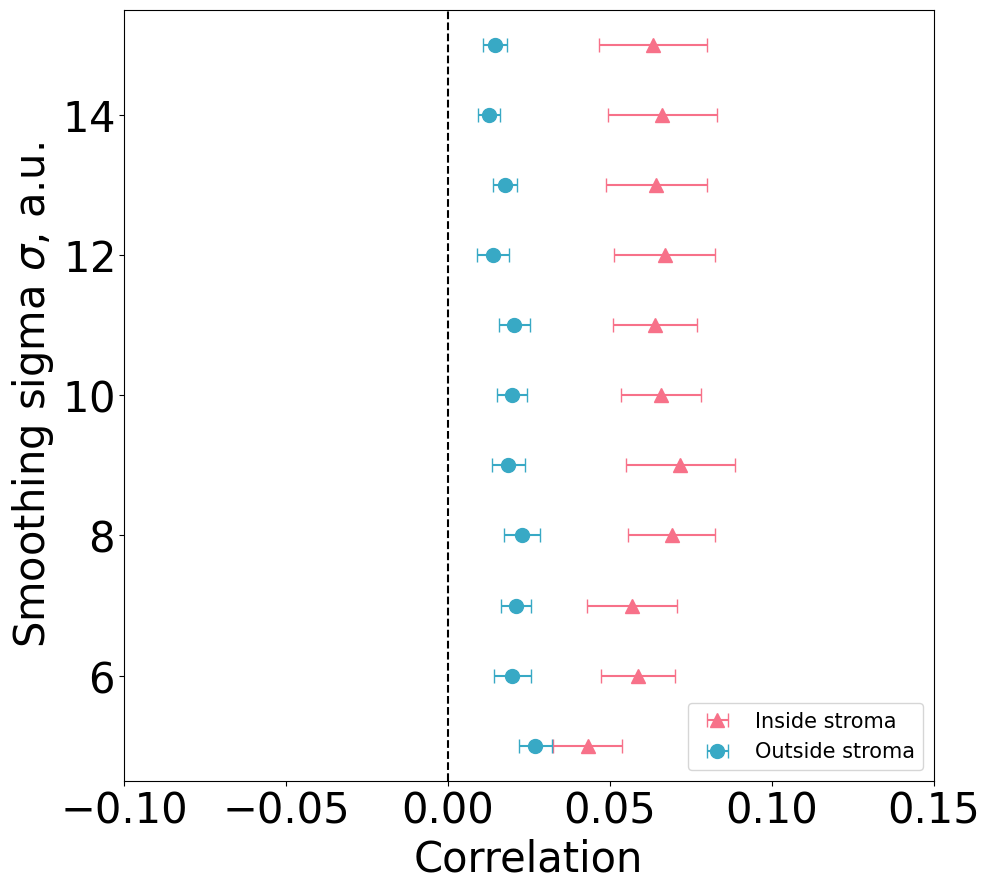

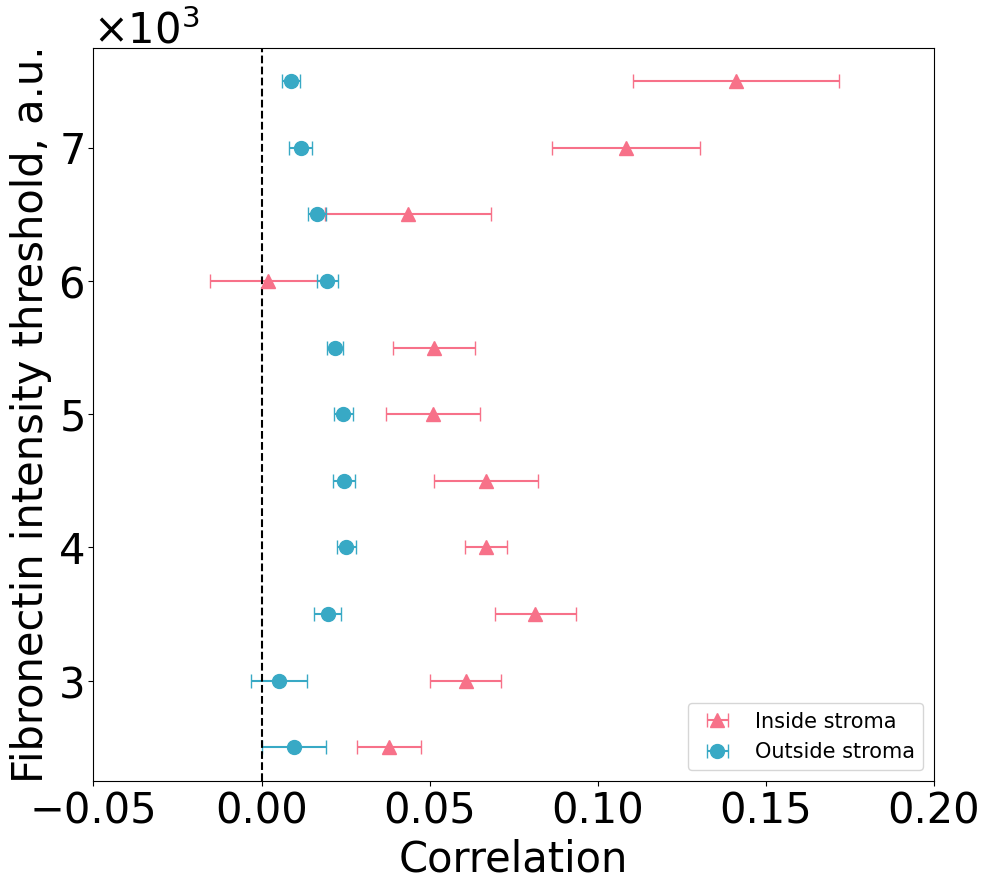

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def bootstrap_sem(data, n_bootstrap=500):
    """Calculate the standard error of the median using bootstrapping."""
    medians = [data.sample(frac=1, replace=True).median() for _ in range(n_bootstrap)]
    return np.std(medians)

# Path to the folder containing CSV files
folder_path = "//Users/antoine/Harvard/IAC/image_analysis_paper_QP_projects/AsPC_Ki67/results/sensitivity/20250328_thresholdss5-15_fn2500-7500"

# Get the list of CSV files
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create color mapping for each CSV file
color_palette = sns.color_palette("husl", len(csv_files))
image_colors = {file: color for file, color in zip(csv_files, color_palette)}

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # Read CSV file and append to the list
        df = pd.read_csv(os.path.join(folder_path, file))
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
df_stroma = pd.concat(dfs, ignore_index=True)

# Remove leading/trailing whitespace from column names
df_stroma.columns = df_stroma.columns.str.strip()

# Print the column names to check
print("Column names in the DataFrame after stripping whitespace:")
print(df_stroma.columns)

# Check if the required columns are present
required_columns = ['pearsonInsideStromaKerPNDRG1', 'pearsonOutsideStromaKerPNDRG1']
for col in required_columns:
    if col not in df_stroma.columns:
        raise KeyError(f"Column {col} is not present in the DataFrame.")

# Group the data by 'sigma' and calculate the median
grouped_sigma = df_stroma.groupby('sigma')
avg_corr_sigma = grouped_sigma[['pearsonInsideStromaKerPNDRG1', 'pearsonOutsideStromaKerPNDRG1']].median()

# Calculate the SEM for each group using bootstrapping
sem_corr_sigma = grouped_sigma.apply(lambda x: pd.Series({
    'pearsonInsideStromaKerPNDRG1': bootstrap_sem(x['pearsonInsideStromaKerPNDRG1']),
    'pearsonOutsideStromaKerPNDRG1': bootstrap_sem(x['pearsonOutsideStromaKerPNDRG1'])
}))

# Group the data by 'FN_568' and calculate the median
grouped_FN_568 = df_stroma.groupby('TRITC FN')
avg_corr_FN_568 = grouped_FN_568[['pearsonInsideStromaKerPNDRG1', 'pearsonOutsideStromaKerPNDRG1']].median()

# Calculate the SEM for each group using bootstrapping
sem_corr_FN_568 = grouped_FN_568.apply(lambda x: pd.Series({
    'pearsonInsideStromaKerPNDRG1': bootstrap_sem(x['pearsonInsideStromaKerPNDRG1']),
    'pearsonOutsideStromaKerPNDRG1': bootstrap_sem(x['pearsonOutsideStromaKerPNDRG1'])
}))

# Print median value range for sigma plot
inside_range_sigma = avg_corr_sigma["pearsonInsideStromaKerPNDRG1"].min(), avg_corr_sigma["pearsonInsideStromaKerPNDRG1"].max()
outside_range_sigma = avg_corr_sigma["pearsonOutsideStromaKerPNDRG1"].min(), avg_corr_sigma["pearsonOutsideStromaKerPNDRG1"].max()

print(f"[Sigma] Inside stroma median correlation spans from {inside_range_sigma[0]:.2f} to {inside_range_sigma[1]:.2f}")
print(f"[Sigma] Outside stroma median correlation spans from {outside_range_sigma[0]:.2f} to {outside_range_sigma[1]:.2f}")

# Create the first plot for 'sigma'
fig1, ax1 = plt.subplots(figsize=(10, 9))

# Plot data on the first plot with error bars
ax1.errorbar(avg_corr_sigma["pearsonInsideStromaKerPNDRG1"], avg_corr_sigma.index, xerr=sem_corr_sigma["pearsonInsideStromaKerPNDRG1"], fmt='^', color=color_palette[0], label='Inside stroma', markersize=10, capsize=5)
ax1.errorbar(avg_corr_sigma["pearsonOutsideStromaKerPNDRG1"], avg_corr_sigma.index, xerr=sem_corr_sigma["pearsonOutsideStromaKerPNDRG1"], fmt='o', color=color_palette[3], label='Outside stroma', markersize=10, capsize=5)
ax1.axvline(x=0, color='black', ls='--')
ax1.legend(prop={'size': 15}, loc='lower right')
ax1.set_xlim(-0.10, 0.15)

# Set the y-axis formatter to display scientific notation with a fixed number of decimals
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=30)
ax1.yaxis.get_offset_text().set_size(30)
ax1.yaxis.get_offset_text().set_fontsize(30)
ax1.yaxis.get_offset_text().set_color('black')

ax1.set_ylabel(r'Smoothing sigma $\sigma$, a.u.', fontsize=30)
ax1.set_xlabel('Correlation', fontsize=30)

plt.tight_layout()
plt.savefig('/Users/antoine/Harvard/IAC/image_analysis_paper_QP_projects/AsPC_Ki67/plots/20250328_Ki67_sensitivity_stroma_annotation_sigma.png', dpi=300)
plt.show()

# Create the second plot for 'FN_568'
fig2, ax2 = plt.subplots(figsize=(10, 9))

# Plot data on the second plot with error bars
ax2.errorbar(avg_corr_FN_568["pearsonInsideStromaKerPNDRG1"], avg_corr_FN_568.index, xerr=sem_corr_FN_568["pearsonInsideStromaKerPNDRG1"], fmt='^', color=color_palette[0], label='Inside stroma', markersize=10, capsize=5)
ax2.errorbar(avg_corr_FN_568["pearsonOutsideStromaKerPNDRG1"], avg_corr_FN_568.index, xerr=sem_corr_FN_568["pearsonOutsideStromaKerPNDRG1"], fmt='o', color=color_palette[3], label='Outside stroma', markersize=10, capsize=5)
ax2.axvline(x=0, color='black', ls='--')
ax2.legend(prop={'size': 15}, loc='lower right')
ax2.set_xlim(-0.05, 0.2)

# Set the y-axis formatter to display scientific notation with a fixed number of decimals
ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='minor', labelsize=30)
ax2.yaxis.get_offset_text().set_size(30)
ax2.yaxis.get_offset_text().set_fontsize(30)
ax2.yaxis.get_offset_text().set_color('black')

ax2.set_ylabel('Fibronectin intensity threshold, a.u.', fontsize=30)
ax2.set_xlabel('Correlation', fontsize=30)

plt.tight_layout()
plt.savefig('/Users/antoine/Harvard/IAC/image_analysis_paper_QP_projects/AsPC_Ki67/plots/20250328_Ki67_sensitivity_stroma_annotation_FN_568.png', dpi=300)
plt.show()


In [9]:
from scipy.stats import wilcoxon

# For the sigma plot
inside_sigma = avg_corr_sigma["pearsonInsideStromaKerPNDRG1"]
outside_sigma = avg_corr_sigma["pearsonOutsideStromaKerPNDRG1"]

stat_sigma, pvalue_sigma = wilcoxon(inside_sigma, outside_sigma, alternative='two-sided')
print(f"[Sigma] Wilcoxon p-value: {pvalue_sigma:.3e}")

# For the FN_568 plot
inside_FN_568 = avg_corr_FN_568["pearsonInsideStromaKerPNDRG1"]
outside_FN_568 = avg_corr_FN_568["pearsonOutsideStromaKerPNDRG1"]

stat_FN568, pvalue_FN_568 = wilcoxon(inside_FN_568, outside_FN_568, alternative='two-sided')
print(f"[FN_568] Wilcoxon p-value: {pvalue_FN_568:.3e}")


[Sigma] Wilcoxon p-value: 9.766e-04
[FN_568] Wilcoxon p-value: 1.953e-03


In [20]:
from scipy.stats import ttest_rel

# Paired t-test for sigma plot
t_stat_sigma, pval_ttest_sigma = ttest_rel(inside_sigma, outside_sigma)
print(f"[Sigma] Paired t-test p-value: {pval_ttest_sigma:.4e}")

# Paired t-test for FN_568 plot
t_stat_FN, pval_ttest_FN = ttest_rel(inside_FN_568, outside_FN_568)
print(f"[FN_568] Paired t-test p-value: {pval_ttest_FN:.4e}")


[Sigma] Paired t-test p-value: 9.6627e-08
[FN_568] Paired t-test p-value: 2.5919e-03
